In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [226, 226]

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
train_directory='/content/drive/My Drive/Colab Notebooks/datasets/snake/train'
test_directory='/content/drive/My Drive/Colab Notebooks/datasets/snake/test'
val_directory='/content/drive/My Drive/Colab Notebooks/datasets/snake/valid'

In [13]:
print(train_directory)
print(test_directory)
print(val_directory)

/content/drive/My Drive/Colab Notebooks/datasets/snake/train
/content/drive/My Drive/Colab Notebooks/datasets/snake/test
/content/drive/My Drive/Colab Notebooks/datasets/snake/valid


In [14]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [16]:
folders = glob('/content/drive/My Drive/Colab Notebooks/datasets/snake/train/*')
len(folders)

6

In [17]:

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 226, 226, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 226, 226, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 226, 226, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (226, 226),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (226, 226),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1725 images belonging to 6 classes.
Found 575 images belonging to 6 classes.


In [21]:
print(len(training_set))
print(len(test_set))

54
18


In [22]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
54/54 [==============================] - 1230s 22s/step - loss: 1.9683 - accuracy: 0.3003 - val_loss: 1.8196 - val_accuracy: 0.2974
Epoch 2/5
54/54 [==============================] - 47s 868ms/step - loss: 1.3534 - accuracy: 0.4725 - val_loss: 1.7643 - val_accuracy: 0.3496
Epoch 3/5
54/54 [==============================] - 47s 862ms/step - loss: 1.0861 - accuracy: 0.5884 - val_loss: 1.7864 - val_accuracy: 0.3461
Epoch 4/5
54/54 [==============================] - 46s 855ms/step - loss: 0.9886 - accuracy: 0.6371 - val_loss: 1.7677 - val_accuracy: 0.3652
Epoch 5/5
54/54 [==============================] - 46s 857ms/step - loss: 0.8631 - accuracy: 0.6910 - val_loss: 1.7398 - val_accuracy: 0.3826


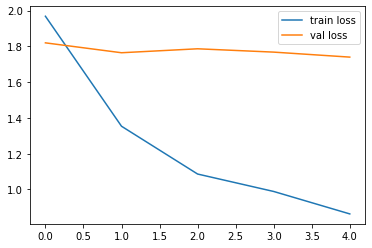

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

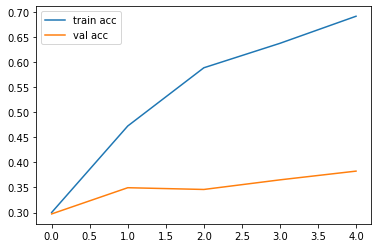

In [24]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [25]:
model.save('BC.h5')

In [26]:
from google.colab import files
files.download("BC.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)

In [28]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [29]:
def output(location):
    img=load_img(location,target_size=(226,226,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'453_MoreliaSpilota'

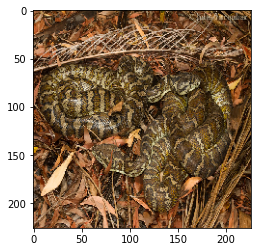

In [32]:
img='/content/drive/My Drive/Colab Notebooks/datasets/snake/valid/453_MoreliaSpilota/f64a04f754ea4c4da5e07a5bd6443cb6.jpg'
pic=load_img('/content/drive/My Drive/Colab Notebooks/datasets/snake/valid/453_MoreliaSpilota/f64a04f754ea4c4da5e07a5bd6443cb6.jpg',target_size=(226,226,3))
plt.imshow(pic)
output(img)